In [38]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [39]:
# label: true = 0, fake = 1

In [40]:
experiment_name = "gpt2_test"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [41]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [42]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 2
    })
})

In [43]:
fake_train_dataset['train'][0]

{'text': ' By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 June 2012 . | . UPDATED: . 11:02 EST, 14  June 2013. Posted by Michael at 12/11-12',
 'label': 1}

In [44]:
print(fake_train_dataset['train'][0]['text'])

 By . Kristie Lau . PUBLISHED: . 10:48 EST, 14 June 2012 . | . UPDATED: . 11:02 EST, 14  June 2013. Posted by Michael at 12/11-12


In [45]:
fake_train_dataset['train'][2]

{'text': ' Cover-up: Former Archbishop Lord Hope allowed a paedophile priest to escape punishment for sex crimes, a judge\'s report claims .     (Photo by Andrew Harnik/AFP) . The Catholic Church has been accused of "unlawful" conduct in its handling and treatment over the past decade as it tries not only an alleged child abuser but also one who was convicted on charges including rape after being found guilty at his trial last year. The Vatican said that while there were no grounds against him or others in',
 'label': 1}

In [46]:
print(fake_train_dataset['train'][2]["text"])

 Cover-up: Former Archbishop Lord Hope allowed a paedophile priest to escape punishment for sex crimes, a judge's report claims .     (Photo by Andrew Harnik/AFP) . The Catholic Church has been accused of "unlawful" conduct in its handling and treatment over the past decade as it tries not only an alleged child abuser but also one who was convicted on charges including rape after being found guilty at his trial last year. The Vatican said that while there were no grounds against him or others in


In [47]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,"By . Kristie Lau . PUBLISHED: . 10:48 EST, 14...",1
1,"By . Kristie Lau . PUBLISHED: . 10:48 EST, 14...",0
2,Cover-up: Former Archbishop Lord Hope allowed...,1
3,"By . Anthony Bond . PUBLISHED: . 07:03 EST, 2...",0
4,Roy Hodgson has come under fire for making pu...,1


In [48]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 478.8333333333333
Average size of text with label 1 (=Fake text): 462.9


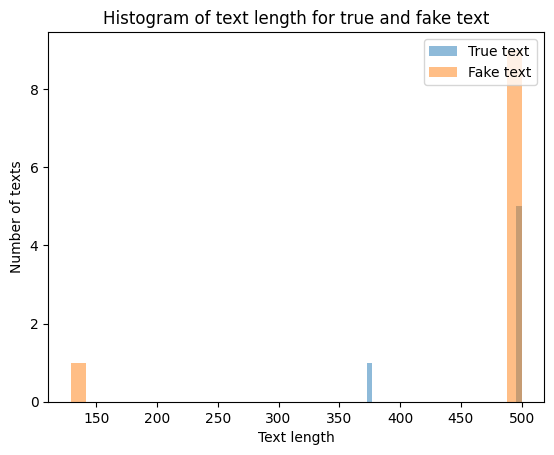

In [49]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [50]:
# print text where length is greater than 2000
print(fake_train_df[fake_train_df["text"].apply(len) > 2000]["text"].values[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [13]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 2.0
Average number of newlines in text with label 1 (=Fake text): 2.0


In [83]:
fake_train_df.describe()

,label
count,16.000000
mean,0.500000
std,0.516398
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [84]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,8.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [62]:
fake_train_df.head(20)

,text,label
0,Instruction: \n Write a funny and whimsical h...,0
1,Instruction: \n If McDonald’s were to go out ...,1
2,Instruction: \n what is the difference betwee...,1
3,Instruction: \n Who were the children of the ...,0
4,Instruction: \n Who was the first person to d...,0
5,Instruction: \n What was most important inven...,1


In [33]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 386.2857142857143
Average size of text with label 1 (=Fake text): 393.5


In [38]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


223.75

In [15]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


8.133333333333333

In [44]:
# find filtering such that wasserstein distance is minimized
wasserstein_distances = []
for i in range(300, 1000, 100):
    fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < i]
    true_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)
    fake_text_lengths = fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)
    wasserstein_distances.append({"threshold": i, "wasserstein_distance": wasserstein_distance(true_text_lengths, fake_text_lengths)})
wasserstein_distances


[{'threshold': 300, 'wasserstein_distance': 47.666666666666664},
 {'threshold': 400, 'wasserstein_distance': 66.0},
 {'threshold': 500, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 600, 'wasserstein_distance': 76.83333333333334},
 {'threshold': 700, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 800, 'wasserstein_distance': 105.22857142857144},
 {'threshold': 900, 'wasserstein_distance': 100.49999999999999}]